# Importing Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

# Preprocessing Steps

## Reading the Dataset

In [2]:
df=pd.read_csv(r'C:\Users\ganga\Downloads\Mall_Customers.csv')

In [3]:
## For displaying the top 5 rows of the dataset
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Summary of Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### Shape of Data

In [5]:
df.shape

(200, 5)

### Names of Columns

In [6]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

### Datatype of Columns

In [7]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [8]:
## So, the dataset has 200 rows and 5 columns.

### Preview of Dataset

In [9]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Checking Missing Values

In [10]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [11]:
## As there are no missing values, we need not to do null value treatment.

## Memory Optimization

In [12]:
old_memory=df.memory_usage().sum()
print(old_memory)

8128


In [13]:
for i in df.describe().columns:
    if 'int' in str(df[i].dtype):
        print(i,df[i].dtype)
        if df[i].min()>np.iinfo(np.int8).min and df[i].max()<np.iinfo(np.int8).max:
            df[i]=df[i].astype(np.int8)
        elif df[i].min()>np.iinfo(np.int16).min and df[i].max()<np.iinfo(np.int16).max:
            df[i]=df[i].astype(np.int16)
        elif df[i].min()>np.iinfo(np.int32).min and df[i].max()<np.iinfo(np.int32).max:
            df[i]=df[i].astype(np.int32)
        elif df[i].min()>np.iinfo(np.int64).min and df[i].max()<np.iinfo(np.int64).max:
            df[i]=df[i].astype(np.int64)

CustomerID int64
Age int64
Annual Income (k$) int64
Spending Score (1-100) int64


In [14]:
new_memory=df.memory_usage().sum()
print(new_memory)

2928


### Lift Calculation

In [15]:
lift = ((old_memory-new_memory)/old_memory)*100
print(lift)

63.976377952755904


## Outlier Treatment

In [16]:
def outlier_treatment(x):
    for i in x.describe().columns:
        qrt1=np.quantile(x[i],0.25)
        qrt2=np.quantile(x[i],0.50)
        qrt3=np.quantile(x[i],0.75)
        iqrt=qrt3-qrt1
        utv=qrt3+1.5*(iqrt)
        ltv=qrt1-1.5*(iqrt)
        outlier_treated_values=[]
        for i in x[i]:
            if i<ltv or i>utv:
                outlier_treated_values.append(x[i].median())
            else:
                outlier_treated_values.append(i)
                return x
        x[i]=outlier_treated_values

In [33]:
data=outlier_treatment(df)

## Label Encoding

In [19]:
LE=LabelEncoder()
LE.fit(data['Gender'])
LE.transform(data['Gender'])

LabelEncoder()

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1])

In [20]:
data['Gender']=LE.transform(data['Gender'])

In [21]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


## Scaling

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
def standard_scaler(x):
    df_numerical=x[x.describe().columns]
    mn=MinMaxScaler()
    mn.fit(df_numerical)
    mn.transform(df_numerical)
    df_Standard_Scale=pd.DataFrame(mn.transform(df_numerical),columns=df_numerical.columns)
    return df_Standard_Scale

In [24]:
data_1=standard_scaler(data)

In [25]:
data_1

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0.000000,1.0,0.019231,0.000000,0.387755
1,0.005025,1.0,0.057692,0.000000,0.816327
2,0.010050,0.0,0.038462,0.008197,0.051020
3,0.015075,0.0,0.096154,0.008197,0.775510
4,0.020101,0.0,0.250000,0.016393,0.397959
...,...,...,...,...,...
195,0.979899,0.0,0.326923,0.860656,0.795918
196,0.984925,0.0,0.519231,0.909836,0.275510
197,0.989950,1.0,0.269231,0.909836,0.744898
198,0.994975,1.0,0.269231,1.000000,0.173469


# Exploratory Data Analysis

## Univariate Analysis

### Study of Gender Variable

In [26]:
data['Gender'].value_counts()

0    112
1     88
Name: Gender, dtype: int64

In [27]:
data['Gender'].value_counts(normalize=True)*100

0    56.0
1    44.0
Name: Gender, dtype: float64

<AxesSubplot:xlabel='Gender', ylabel='count'>

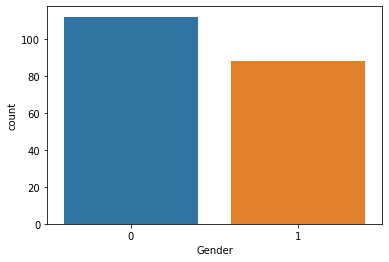

In [28]:
sns.countplot(data['Gender'])

In [29]:
1. In the distribution of mall customers, female customers are more compared to male customers

SyntaxError: invalid syntax (1313681022.py, line 1)

### Analysis of Age Variable

<Figure size 720x720 with 0 Axes>

<AxesSubplot:xlabel='Age'>

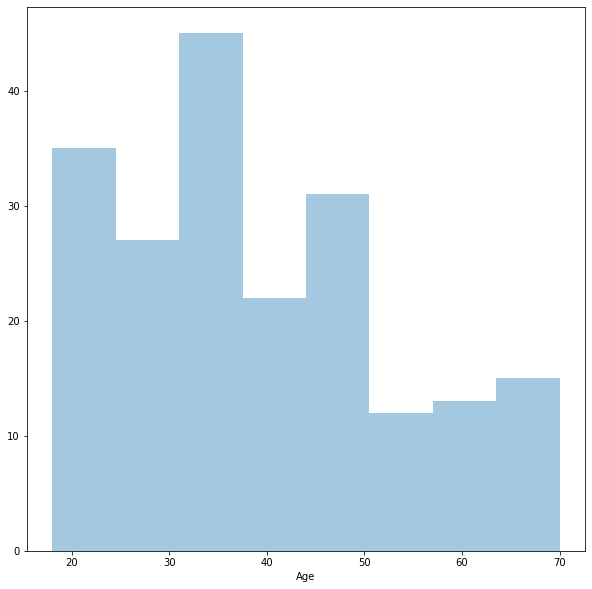

In [95]:
plt.figure(figsize=(10,10))
sns.distplot(data['Age'], kde=False)

In [ ]:
1. High number of mall customers were between the age group of 30 to 40.
2. No mall customers of 0 to 10 and above 70 age group.
3. 50 to 60 age group mall customers are low in number compared to other age groups.

In [96]:
((data[data['Age']<50].shape[0])/data.shape[0])*100

77.5

In [ ]:
## So, More than 75% of mall customers belongs to the age group of 10 to 50.

### Analysis of Annual Income Variable

<Figure size 720x720 with 0 Axes>

<AxesSubplot:xlabel='Annual Income (k$)'>

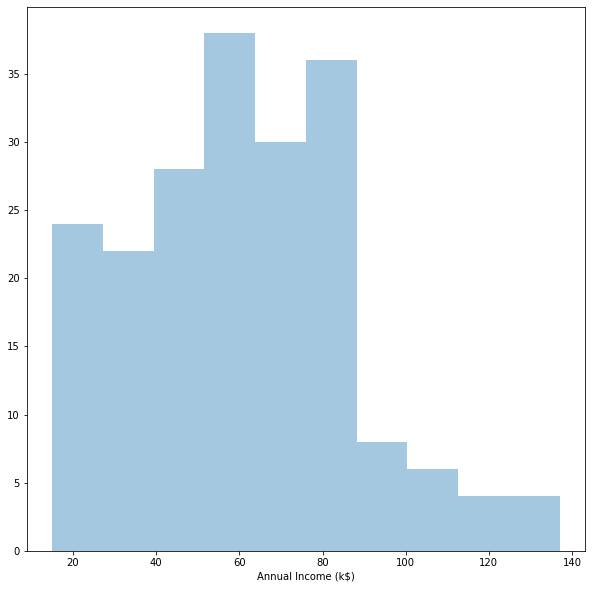

In [97]:
plt.figure(figsize=(10,10))
sns.distplot(data['Annual Income (k$)'], kde=False)

In [ ]:
1. More number of mall customers were having an annual income of 50 to 60 dollars.
2. No customer is having an annual income of more than 138 dollars.
3. Only a few customers, i.e, less than 5 has an annual income of more than 110 dollars.

In [98]:
((data[data['Annual Income (k$)']<80].shape[0])/data.shape[0])*100

81.0

In [ ]:
## Hence, 80% mall customers annual income was between 10 to 80 dollars.

### Analysis of Spending Score

<Figure size 720x720 with 0 Axes>

<AxesSubplot:xlabel='Spending Score (1-100)'>

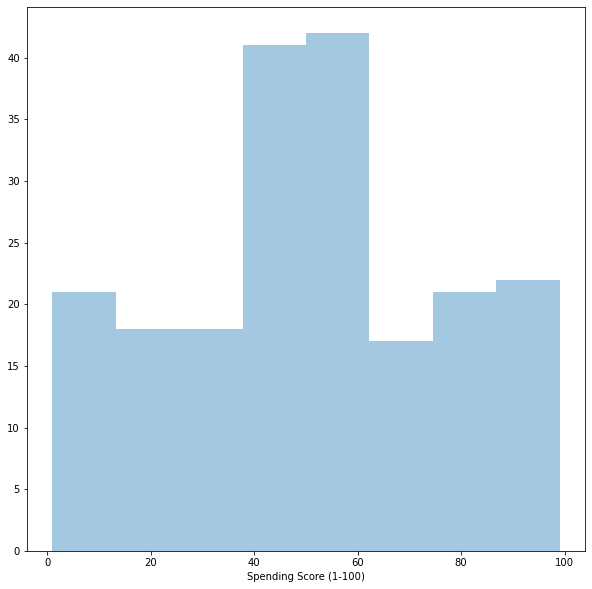

In [99]:
plt.figure(figsize=(10,10))
sns.distplot(data['Spending Score (1-100)'], kde=False)

In [ ]:
1. High number of mall customers has a spending score of 40 to 60.
2. No mall customer has a spending score of 100.
3. More thnan 20 mall customers has a low spending score, i.e between 0 to 20

In [100]:
((data[data['Spending Score (1-100)']<60].shape[0])/data.shape[0])*100

67.5

In [ ]:
## The spending score of more than 65% customers is below 60.

## Bivariate Analysis

### Analysis of One Continuous and One Categorical Variables

In [101]:
def class_continous_variables(df,var1,var2,choice):
    if choice=='violin':
        plt.figure(figsize=(10,5))
        sns.violinplot(df[var1],df[var2])
    else:
        plt.figure(figsize=(10,5))
        plt.scatter(df[var1],df[var2])

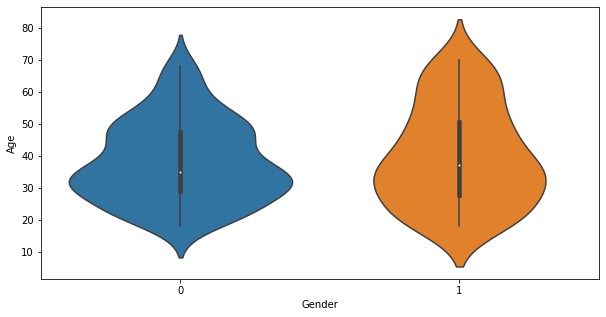

In [102]:
class_continous_variables(data,'Gender','Age','violin')

In [ ]:
1. In mall customers population, female between 25 to 40 age group are more which is almost similar in case of male customers as well.
2. No female customers or less female customers above the age of 75.
3. Male customers below the age group of 10 are high in number compared to females.

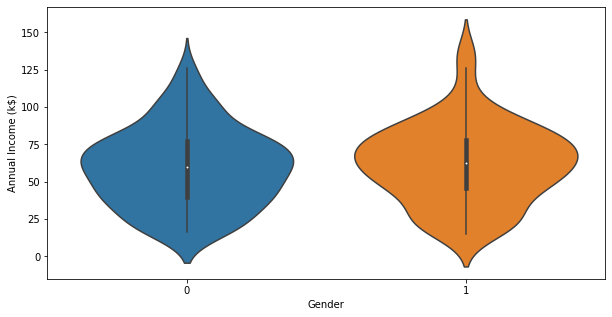

In [103]:
class_continous_variables(data,'Gender','Annual Income (k$)','violin')

In [ ]:
1. There are no female customers with annual income above 150 dollars.
2. Most of the female customers have annual income between 25 to 75 dollars.
3. Most of the male customers have annual income between 30 to 80 dollars.
4. Very few male and female customers has income above 100 dollars per annum.

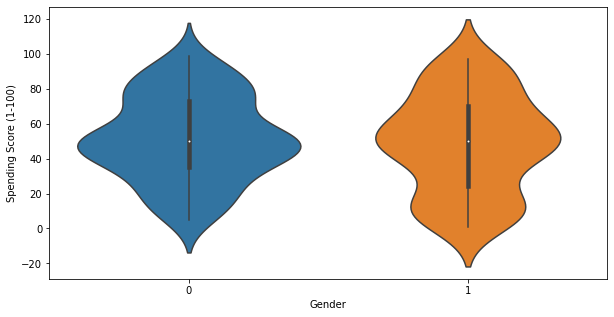

In [104]:
class_continous_variables(data,'Gender','Spending Score (1-100)','violin')

In [ ]:
1. More male customers has 0 spending score compared to females.
2. High number of male and female customers has a spending score between 25 to 60.
3. Male and female customers with spending score above 100 are less in number.

### Analysis of Two Continuous Variables

In [105]:
def continous_variables(df,var1,var2,choice):
    if choice=='seaborn':
        plt.figure(figsize=(10,5))
        sns.scatterplot(df[var1],df[var2],color='r')
    else:
        plt.figure(figsize=(10,5))
        plt.scatter(df[var1],df[var2],color='r')

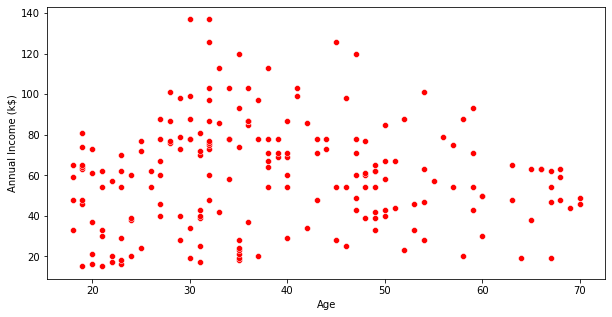

In [106]:
continous_variables(data,'Age','Annual Income (k$)','seaborn')

In [ ]:
1. No annual income is observed for customers above age group 70.
2. Mall cutomers with age 30 has high annual income.
3. Mall customers of 60 to 70 age group has very low income.

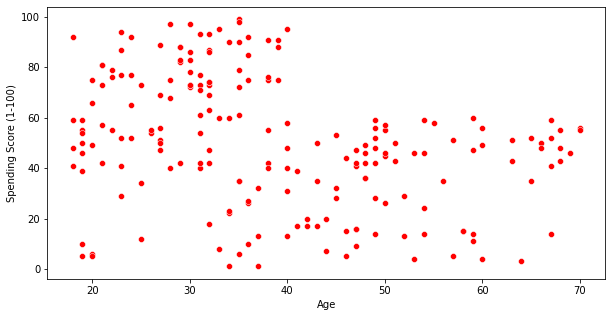

In [107]:
continous_variables(data,'Age','Spending Score (1-100)','seaborn')

In [ ]:
1. Mall customers of 20 to 30 age group has a high spending score.
2. No customer of 45 to 50 age group has spending score above 70.

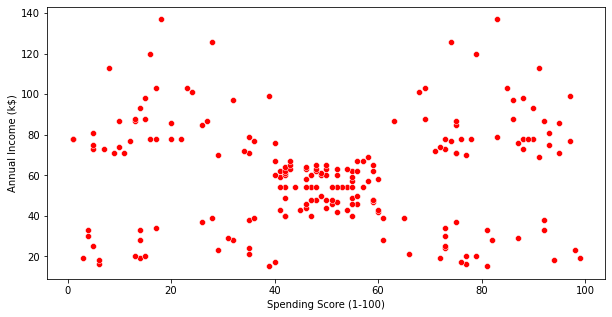

In [108]:
continous_variables(data,'Spending Score (1-100)','Annual Income (k$)','seaborn')

In [ ]:
1. the annual spending score of mall cuatomers with annuall income between 40 to 60 dollars is also between 40 to 60. ()
2. some of the high income people has high spending score while some has low spwnding score. 
3. Some of the low income group customers has a very high spending score.

# Model Building

## Chosing Optimal Number of Clusters Using Kelbow Method

In [31]:
from sklearn.cluster import KMeans

In [36]:
distortion=[]
for i in range (1,11):
    km=KMeans(n_clusters=i)
    km.fit(data_1)
    distortion.append(km.inertia_)

KMeans(n_clusters=1)

KMeans(n_clusters=2)

KMeans(n_clusters=3)

KMeans(n_clusters=4)

KMeans(n_clusters=5)

KMeans(n_clusters=6)

KMeans(n_clusters=7)

KMeans()

KMeans(n_clusters=9)

KMeans(n_clusters=10)

In [37]:
distortion

[103.5156530146308,
 54.05097878661345,
 43.45870535011797,
 34.9217311338733,
 29.781275430976102,
 24.95631780523889,
 20.401932419701723,
 16.91099992129297,
 14.874672005115137,
 12.749732488994841]

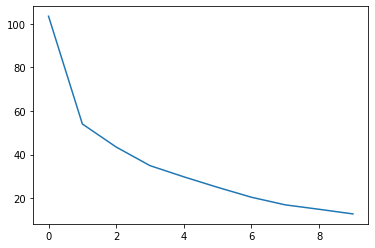

In [38]:
plt.plot(distortion)

## KMeans with Different Clusters

### With 5 Clusters

In [54]:
km = KMeans(n_clusters=5)
km.fit(data)
km.labels_

KMeans(n_clusters=5)

array([0, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [55]:
data['Cluster']=km.labels_

In [56]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,0
1,2,1,21,15,81,0
2,3,0,20,16,6,4
3,4,0,23,16,77,0
4,5,0,31,17,40,4


### Grouping Data Based on Clusters

In [57]:
data.groupby('Cluster').sum()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,,
0,553,10,606.0,620,1846.0
1,5904,19,1469.0,3165,644.0
2,6318,18,1275.0,3375,3203.0
3,5924,27,2656.0,3673,3106.0
4,1401,14,1764.0,1279,1241.0


In [58]:
data.groupby('Cluster').describe().T

Cluster                               0           1           2           3  \
CustomerID             count  24.000000   36.000000   39.000000   63.000000   
                       mean   23.041667  164.000000  162.000000   94.031746   
                       std    14.072728   21.071308   22.803509   18.440811   
                       min     1.000000  129.000000  124.000000   62.000000   
                       25%    11.500000  146.500000  143.000000   78.500000   
                       50%    23.000000  164.000000  162.000000   94.000000   
                       75%    34.500000  181.500000  181.000000  109.500000   
                       max    46.000000  199.000000  200.000000  127.000000   
Gender                 count  24.000000   36.000000   39.000000   63.000000   
                       mean    0.416667    0.527778    0.461538    0.428571   
                       std     0.503610    0.506309    0.505035    0.498847   
                       min     0.000000    0.000000    0.000000    0.000000   
                       25%     0.000000    0.000000    0.000000    0.000000   
                       50%     0.000000    1.000000    0.000000    0.000000   
                       75%     1.000000    1.000000    1.000000    1.000000   
                       max     1.000000    1.000000    1.000000    1.000000   
Age                    count  24.000000   36.000000   39.000000   63.000000   
                       mean   25.250000   40.805556   32.692308   42.158730   
                       std     5.326309   11.305674    3.728650   16.879274   
                       min    18.000000   19.000000   27.000000   18.000000   
                       25%    21.000000   34.000000   30.000000   25.000000   
                       50%    23.500000   41.500000   32.000000   45.000000   
                       75%    30.000000   47.250000   35.500000   54.500000   
                       max    35.000000   59.000000   40.000000   70.000000   
Annual Income (k$)     count  24.000000   36.000000   39.000000   63.000000   
                       mean   25.833333   87.916667   86.538462   58.301587   
                       std     8.057762   16.231143   16.312485    6.549156   
                       min    15.000000   71.000000   69.000000   46.000000   
                       25%    19.000000   77.000000   75.500000   54.000000   
                       50%    24.500000   83.000000   79.000000   60.000000   
                       75%    33.000000   97.250000   95.000000   63.000000   
                       max    39.000000  137.000000  137.000000   71.000000   
Spending Score (1-100) count  24.000000   36.000000   39.000000   63.000000   
                       mean   76.916667   17.888889   82.128205   49.301587   
                       std    13.416138   10.708549    9.364489    6.724138   
                       min    39.000000    1.000000   63.000000   29.000000   
                       25%    72.750000   10.000000   74.500000   43.500000   
                       50%    76.500000   16.000000   83.000000   49.000000   
                       75%    83.250000   24.500000   90.000000   55.000000   
                       max    99.000000   40.000000   97.000000   60.000000   

Cluster                               4  
CustomerID             count  38.000000  
                       mean   36.868421  
                       std    18.417341  
                       min     3.000000  
                       25%    21.500000  
                       50%    40.000000  
                       75%    52.750000  
                       max    63.000000  
Gender                 count  38.000000  
                       mean    0.368421  
                       std     0.488852  
                       min     0.000000  
                       25%     0.000000  
                       50%     0.000000  
                       75%     1.000000  
                       max     1.000000  
Age                    count  38.000000  
    

In [70]:
data.reset_index(inplace=True)

### Plotting the Clusters

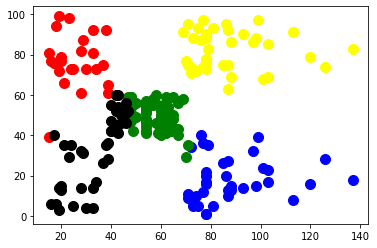

In [90]:
plt.scatter(data['Annual Income (k$)'][data['Cluster']==0],data['Spending Score (1-100)'][data['Cluster']==0], s=100,c='red',label='Cluster1')
plt.scatter(data['Annual Income (k$)'][data['Cluster']==1],data['Spending Score (1-100)'][data['Cluster']==1], s=100,c='blue',label='Cluster2')
plt.scatter(data['Annual Income (k$)'][data['Cluster']==2],data['Spending Score (1-100)'][data['Cluster']==2], s=100,c='yellow',label='Cluster3')
plt.scatter(data['Annual Income (k$)'][data['Cluster']==3],data['Spending Score (1-100)'][data['Cluster']==3], s=100,c='green',label='Cluster4')
plt.scatter(data['Annual Income (k$)'][data['Cluster']==4],data['Spending Score (1-100)'][data['Cluster']==4], s=100,c='black',label='Cluster5')

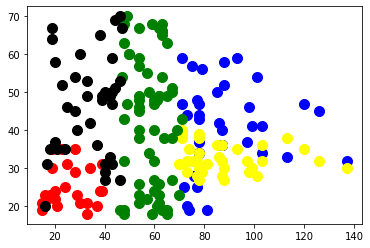

In [83]:
plt.scatter(data['Annual Income (k$)'][data['Cluster']==0],data.Age[data['Cluster']==0], s=100,c='red',label='Cluster1')
plt.scatter(data['Annual Income (k$)'][data['Cluster']==1],data.Age[data['Cluster']==1], s=100,c='blue',label='Cluster2')
plt.scatter(data['Annual Income (k$)'][data['Cluster']==2],data.Age[data['Cluster']==2], s=100,c='yellow',label='Cluster3')
plt.scatter(data['Annual Income (k$)'][data['Cluster']==3],data.Age[data['Cluster']==3], s=100,c='green',label='Cluster4')
plt.scatter(data['Annual Income (k$)'][data['Cluster']==4],data.Age[data['Cluster']==4], s=100,c='black',label='Cluster5')

In [111]:
from sklearn.metrics import silhouette_score

In [112]:
silhouette_score(data,km.labels_)

0.39828578669714715

### With 4 Clusters

In [114]:
km = KMeans(n_clusters=5)
km.fit(data)
km.labels_

KMeans(n_clusters=5)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4])

In [115]:
data['Cluster']=km.labels_

In [116]:
from sklearn.metrics import silhouette_score
silhouette_score(data,km.labels_)

0.3844964653425723

### With 6 Clusters

In [117]:
km = KMeans(n_clusters=6)
km.fit(data)
km.labels_

KMeans(n_clusters=6)

array([2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5,
       2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5,
       2, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 4, 3, 4, 3, 4, 3, 4, 0, 3, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0])

In [118]:
data['Cluster']=km.labels_

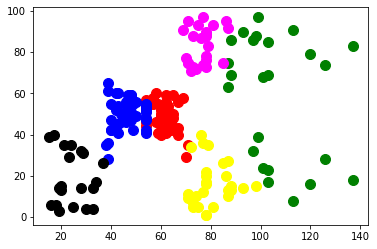

In [123]:
plt.scatter(data['Annual Income (k$)'][data['Cluster']==0],data['Spending Score (1-100)'][data['Cluster']==0], s=100,c='red',label='Cluster1')
plt.scatter(data['Annual Income (k$)'][data['Cluster']==1],data['Spending Score (1-100)'][data['Cluster']==1], s=100,c='blue',label='Cluster2')
plt.scatter(data['Annual Income (k$)'][data['Cluster']==2],data['Spending Score (1-100)'][data['Cluster']==2], s=100,c='yellow',label='Cluster3')
plt.scatter(data['Annual Income (k$)'][data['Cluster']==3],data['Spending Score (1-100)'][data['Cluster']==3], s=100,c='green',label='Cluster4')
plt.scatter(data['Annual Income (k$)'][data['Cluster']==4],data['Spending Score (1-100)'][data['Cluster']==4], s=100,c='black',label='Cluster5')
plt.scatter(data['Annual Income (k$)'][data['Cluster']==5],data['Spending Score (1-100)'][data['Cluster']==5], s=100,c='magenta',label='Cluster6')

In [119]:
from sklearn.metrics import silhouette_score
silhouette_score(data,km.labels_)

0.4125938975372169

### With 7 Clusters

In [120]:
km = KMeans(n_clusters=7)
km.fit(data)
km.labels_

KMeans(n_clusters=7)

array([4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6,
       4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 1, 6, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 5, 0, 5, 2, 5, 2, 5,
       2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5,
       2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 3, 2, 3, 2, 5, 2, 3,
       2, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3])

In [121]:
data['Cluster']=km.labels_

In [122]:
from sklearn.metrics import silhouette_score
silhouette_score(data,km.labels_)

0.40995499476263675

In [124]:
km = KMeans(n_clusters=8)
km.fit(data)
km.labels_
data['Cluster']=km.labels_

KMeans()

array([2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7,
       2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 5, 7, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 6, 1, 6, 1, 6, 1, 6, 1,
       6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1,
       6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4])

In [125]:
from sklearn.metrics import silhouette_score
silhouette_score(data,km.labels_)

0.42752539873070444